# Introduction to Machine Learning

Machine Learning "gives computer the ability to learn without being explicitly programmed".

**How is it related to AI?**

AI is about building *intelligent* machines. ML is about building *intelligent* machines that *learn* (from data). 

**How is it different from traditional programming?**

First. What is a *program*? Well, a program specifies the computation required to generate an output from an input. Normally, it's us, as the programmers, who specify that computation required. 

But, in machine learning that computation is "learned" by the machine itself i.e it finds the program, the computation required.

And that is extremely useful because for a lot of complex (and even seemingly simple) problems, we cannot exactly specify the computation required. 

**Example 1**: Converting Temperature in Celcius (input) to Temperature in Kelvin (output) can be explicitly programmed. But say from Temperature in Celcius (input) we need to calculate/predict no. of buckets of ice cream sold at a store. That cannot be explicitly programmed.

**Example 2**: How would we create a program to recognize "2"? 

Could it handle all these variations?

<img src="../images/twos.png" width="400"/>

In [ ]:
def to_kelvin(temp_in_celcius):
    # k = c * a + b
    # a = 1; b = 273
    temp_in_kelvin = temp_in_celcius + 273
    return temp_in_kelvin

In [1]:
import seaborn as sns

In [4]:
data = np.array([[20, 30], [40, 70], [25, 40], [30, 50]])

In [6]:
df = pd.DataFrame(data, columns=['celcius', 'icecream'])

## Types of Machine Learning problems

There are many ways we can divide ML problems. But generally we can think in terms of these axes:

I. Supervised (has labeled data):
- Regression (output is continuous valued)
- Classification (output is Categorical)

II. Unsupervised (has unlabeled data):
- Dimensionality Reduction, etc (continous valued)
- Clustering (categorical)

## Goalkeeper or not? 

Given a player's height and weight, predict whether they are a goalkeeper or an outfield player.

<img src="../images/gk.jpg" width="300"/>

Supervised -> Classification

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [10]:
df = pd.read_csv('../data/players.csv')

In [11]:
df.head()

,player_api_id,player_name,height,weight,Position
0,209371,Ali Messaoud,182.88,168,Outfield
1,172610,Damien Le Tallec,182.88,163,Outfield
2,115719,Dejan Skolnik,175.26,163,Outfield
3,26510,Gabor Babos,195.58,203,GK
4,30990,Justo Villar,180.34,187,GK


## Exercise 1

Scatterplot (using `lmplot`) `height` and `weight`. Also use 'Position' for the `hue` parameter.

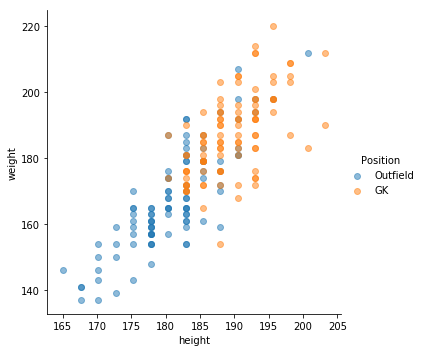

In [18]:
#Code Here
sns.lmplot(x='height', y='weight', data=df, fit_reg=False, scatter_kws={'alpha': 0.5}, hue='Position')

### Exercise 2

Create a new column `Target` by mapping `Position` column. `GK` becomes `1`, `Outfield` becomes `0`.

In [19]:
df['Target'] = df['Position'].map({'GK': 1, 'Outfield': 0})
# df['Target'] = df['Position'].map(lambda x: int(x == 'GK'))

In [20]:
df.head()

,player_api_id,player_name,height,weight,Position,Target
0,209371,Ali Messaoud,182.88,168,Outfield,0
1,172610,Damien Le Tallec,182.88,163,Outfield,0
2,115719,Dejan Skolnik,175.26,163,Outfield,0
3,26510,Gabor Babos,195.58,203,GK,1
4,30990,Justo Villar,180.34,187,GK,1


## Train-Test Split

### Exercise 3

Split `df` into `train_df` (70%) and `test_df` (30%). 

Hint: Use indexing with `loc`.

In [32]:
# Code Here
train_df = df[:140]
test_df = df[140:]

## Self-Made Classifier

We will define a classifier by ourselves by figuring out a threshold that makes sense. 

### Exercise 4

i) Plot `height` distribution of the two groups. Call `sns.distplot` twice. First with data only for `GK`s. Again with data only for `Outfield`s. 

ii) Do the same for `weight`. 

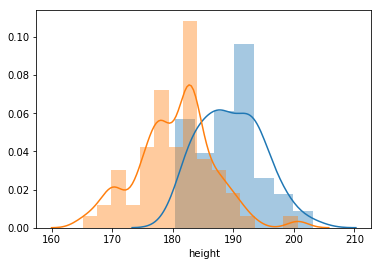

In [40]:
# Code Here
sns.distplot(train_df[train_df['Position'] == 'GK']['height'])
sns.distplot(train_df[train_df['Position'] == 'Outfield']['height'])
plt.show()

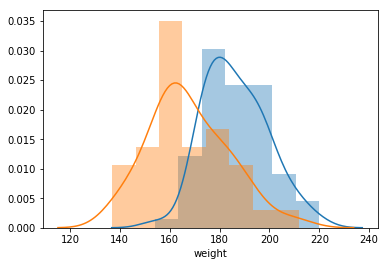

In [41]:
# Code Here
sns.distplot(train_df[train_df['Position'] == 'GK']['weight'])
sns.distplot(train_df[train_df['Position'] == 'Outfield']['weight'])
plt.show()

### Exercise 5

Define a function `classify` that takes 2d numpy list (where each row contains height and weight of one player) and returns a list of predictions. Prediction is `1` if it thinks the person is a `GK` else `0`.

Define thresholds yourself from the above plots. 

Eg: If `height` > ... and `weight` > ... , predict `1`.

In [43]:
inputs = np.array([[190, 180],
                   [190, 140],
                   [150, 160]])
predictions = np.array([1, 0, 0])

In [48]:
# Code Here
def classify(inputs):
    height_threshold = 185
    weight_threshold = 170
    return np.array(
        (inputs[:, 0] > height_threshold) & (inputs[:, 1] > weight_threshold),
        dtype='int')

In [49]:
classify(inputs)

array([1, 0, 0])

### Exercise 6

Compute accuracy of the classifier on the test set. 

You can do it manually by comparing the `Target` column and generated predictions. Or you can use `sklearn.metrics.accuracy_score`.

In [50]:
# Code Here
preds = classify(test_df[['height', 'weight']].values)

In [51]:
from sklearn.metrics import accuracy_score

In [53]:
accuracy_score(test_df['Target'], preds)

0.83333333333333337

## Classification with KNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
classifier = KNeighborsClassifier(n_neighbors=7)

In [86]:
train_x, train_y = train_df[['height', 'weight']].values, train_df['Target'].values

In [87]:
classifier.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [90]:
# Code Here
test_x, test_y = test_df[['height', 'weight']].values, test_df['Target'].values
nn_preds = classifier.predict(test_x)

In [91]:
accuracy_score(test_y, nn_preds)

0.83333333333333337

## Resources

* [Intro to ML: DAT4](https://github.com/justmarkham/DAT4/blob/master/slides/06_ml_knn.pdf)